# Suicide Rates Overview 1985 to 2016

Dataset containing data for suicide numbers for countries and dozen different factors.

Goal is to look for and find any correlations with the suicide rates/cases and different factors.
Like age, country, GDP and gender.

Some of the points to check
1. Trends for suicide rates globaly over time.
2. Trends for suicide rates for different demographics, such as gender, age, generation etc..
3. 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SuicideRates.csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


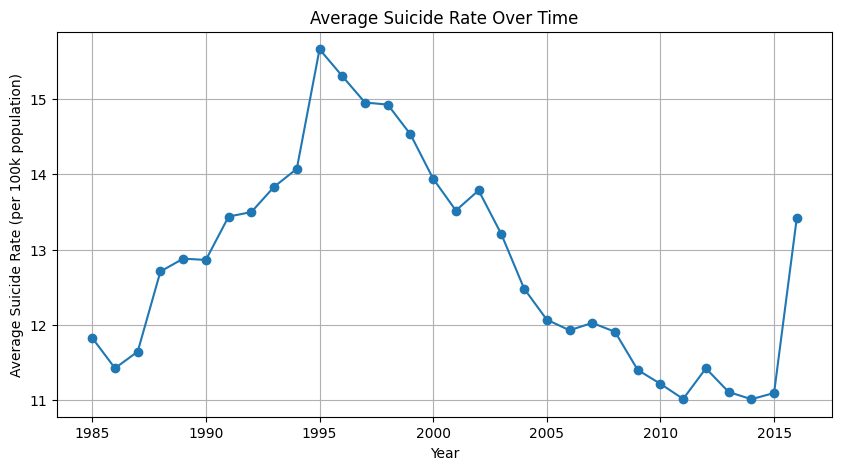

In [29]:
# 1. Trends for suicide rates globaly over time.

# Calculate the average suicide rate for each year
average_suicide_rate = df.groupby('year')['suicides/100k pop'].mean()

# Plot the average suicide rate over time
plt.figure(figsize=(10, 5))
plt.plot(average_suicide_rate.index, average_suicide_rate.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate (per 100k population)')
plt.title('Average Suicide Rate Over Time')
plt.grid(True)

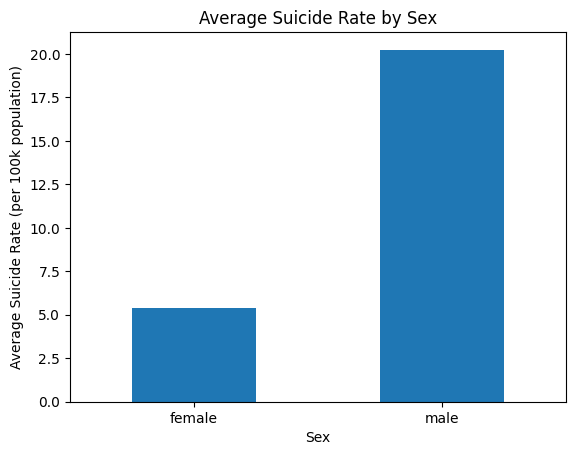

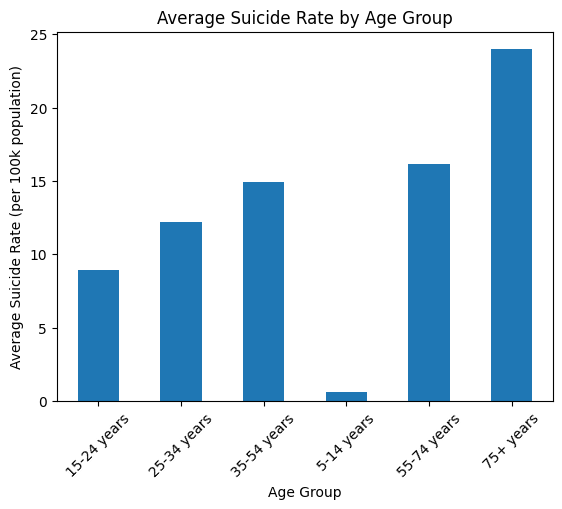

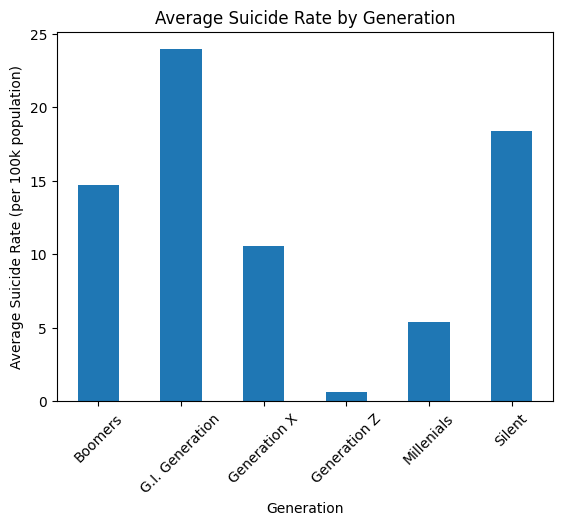

In [31]:
# 2. Trends for suicide rates for different demographics, such as gender, age, generation etc..

# Create bar charts showing the suicide rates broken down by sex
sex_suicide_rates = df.groupby('sex')['suicides/100k pop'].mean()
sex_suicide_rates.plot(kind='bar', rot=0)
plt.xlabel('Sex')
plt.ylabel('Average Suicide Rate (per 100k population)')
plt.title('Average Suicide Rate by Sex')
plt.show()

# Create bar charts showing the suicide rates broken down by age group
age_group_suicide_rates = df.groupby('age')['suicides/100k pop'].mean()
age_group_suicide_rates.plot(kind='bar', rot=45)
plt.xlabel('Age Group')
plt.ylabel('Average Suicide Rate (per 100k population)')
plt.title('Average Suicide Rate by Age Group')
plt.show()

# Calculate the suicide rate for each generation and plot it on a bar chart
generation_suicide_rates = df.groupby('generation')['suicides/100k pop'].mean()
generation_suicide_rates.plot(kind='bar', rot=45)
plt.xlabel('Generation')
plt.ylabel('Average Suicide Rate (per 100k population)')
plt.title('Average Suicide Rate by Generation')
plt.show()